In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('spotify_songs.csv')
print(df.head())
print("\n" + "-"*80 + "\n")
print(df.tail())
print("\n" + "-"*80 + "\n")
print(df.info())
print("\n" + "-"*80 + "\n")
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")
print(df.dtypes)
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
print(df['track_album_release_date'].dtype)

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

Пропущенные значения по столбцам:
                          Количество пропусков  Процент пропусков
track_name                                   5           0.015229
track_artist                                 5           0.015229
track_album_name                             5           0.015229
track_album_release_date                  1886           5.744221
Числовые столбцы: 13
Категориальные столбцы: 10

--------------------------------------------------------------------------------

Осталось пропусков: 0


/tmp/ipython-input-341319674.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_val, inplace=True)
/tmp/ipython-input-341319674.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Количество дубликатов: 0


Полных дубликатов не найдено

Дубликатов по track_id: 4477
track_popularity    :    0 выбросов (0.00%)
danceability        :  123 выбросов (0.37%)
energy              :  166 выбросов (0.51%)
loudness            :  368 выбросов (1.12%)
speechiness         :  612 выбросов (1.86%)
acousticness        :  657 выбросов (2.00%)
instrumentalness    : 1692 выбросов (5.15%)
liveness            :  831 выбросов (2.53%)
valence             :    0 выбросов (0.00%)
tempo               :  119 выбросов (0.36%)
duration_ms         :  527 выбросов (1.61%)

--------------------------------------------------------------------------------



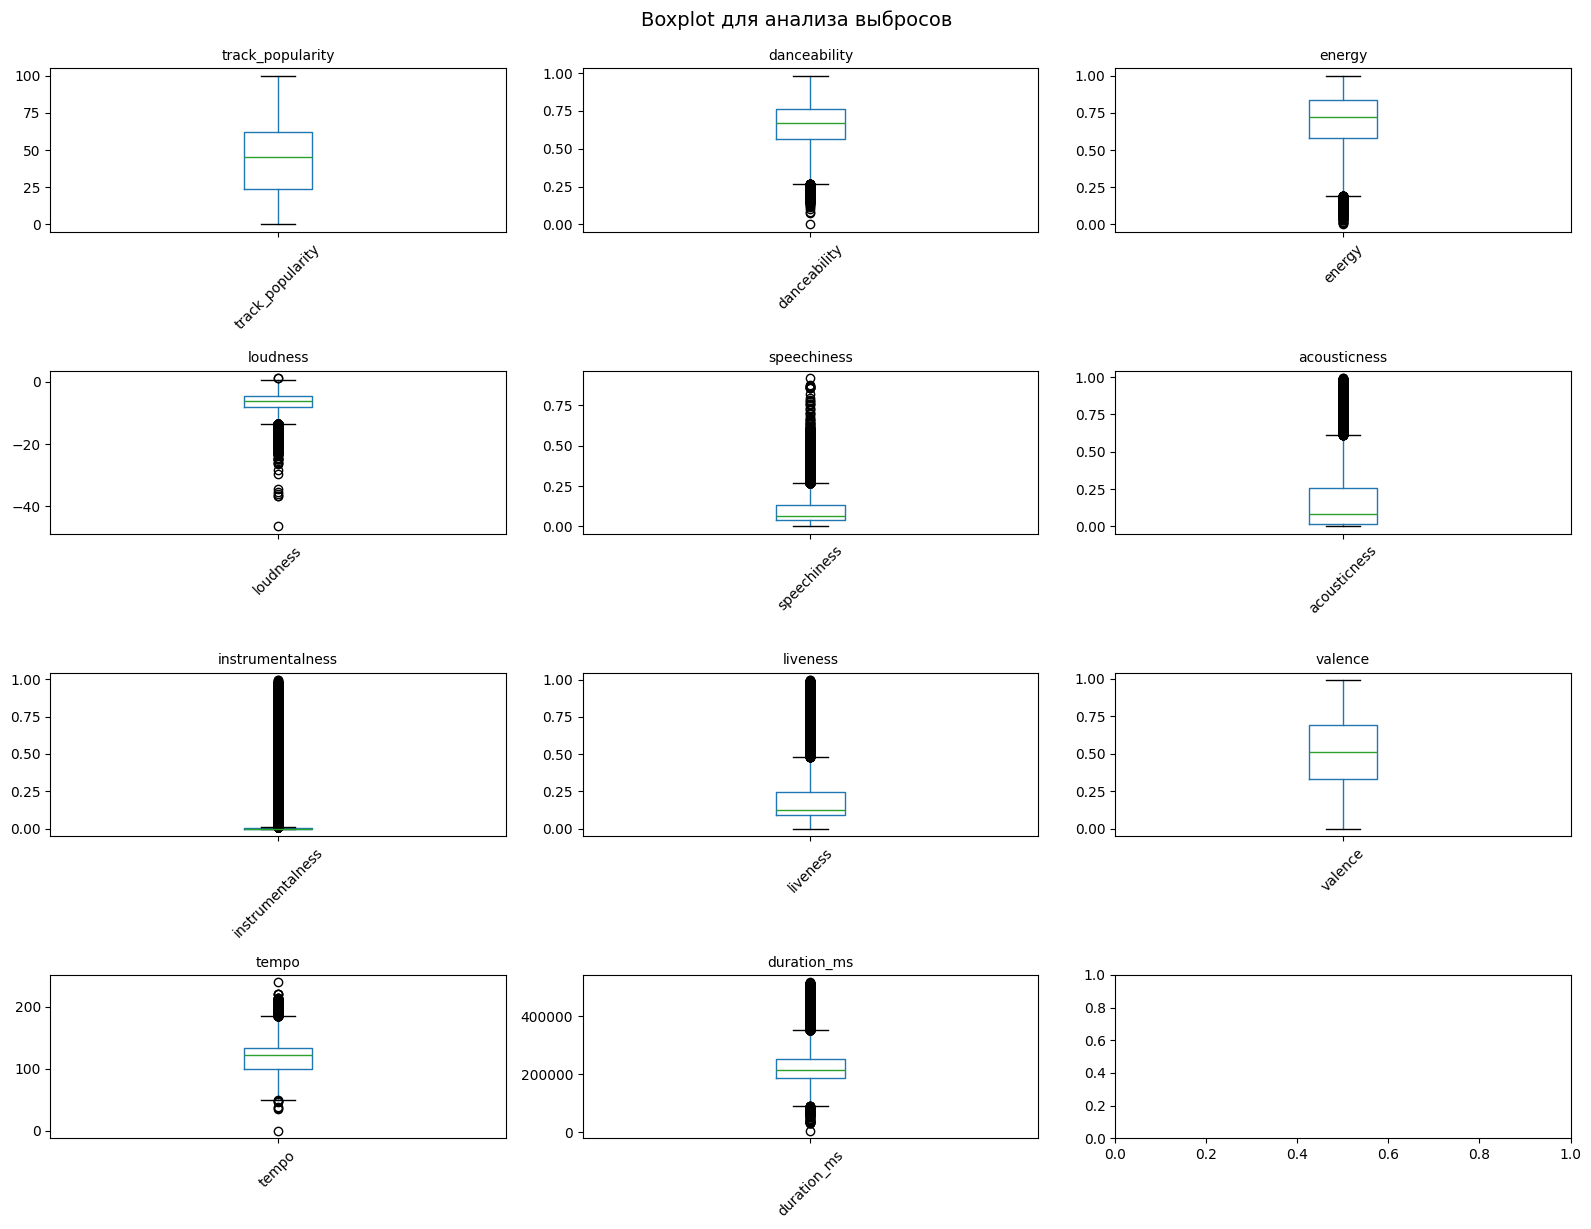

Описательная статистика для числовых признаков:
       track_popularity  danceability        energy      loudness  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619     -6.719499   
std           24.984074      0.145085      0.180910      2.988436   
min            0.000000      0.000000      0.000175    -46.448000   
25%           24.000000      0.563000      0.581000     -8.171000   
50%           45.000000      0.672000      0.721000     -6.166000   
75%           62.000000      0.761000      0.840000     -4.645000   
max          100.000000      0.983000      1.000000      1.275000   

        speechiness  acousticness  instrumentalness      liveness  \
count  32833.000000  32833.000000      32833.000000  32833.000000   
mean       0.107068      0.175334          0.084747      0.190176   
std        0.101314      0.219633          0.224230      0.154317   
min        0.000000      0.000000          0.000000   

In [ ]:
# Поиск пропущенных значений
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Пропущенные значения по столбцам:")
missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})
print(missing_df[missing_df['Количество пропусков'] > 0])

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'datetime64']).columns.tolist()

print(f"Числовые столбцы: {len(numeric_cols)}")
print(f"Категориальные столбцы: {len(categorical_cols)}")

df_cleaned = df.copy()

for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        if col in numeric_cols:
            median_val = df_cleaned[col].median()
            df_cleaned[col].fillna(median_val, inplace=True)
            print(f"Заполнено {col} медианой: {median_val}")
        elif col in categorical_cols:
            if df_cleaned[col].mode().shape[0] > 0:
                mode_val = df_cleaned[col].mode()[0]
                df_cleaned[col].fillna(mode_val, inplace=True)

print("\n" + "-"*80 + "\n")
print(f"Осталось пропусков: {df_cleaned.isnull().sum().sum()}")

duplicates = df_cleaned.duplicated()
print(f"Количество дубликатов: {duplicates.sum()}")

print("\n" + "="*80 + "\n")
if duplicates.sum() > 0:
    print("Примеры дубликатов:")
    print(df_cleaned[duplicates].head())

    # Удалим дубликаты
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"\nПосле удаления дубликатов осталось {df_cleaned.shape[0]} строк")
else:
    print("Полных дубликатов не найдено")

track_id_duplicates = df_cleaned['track_id'].duplicated().sum()
print(f"\nДубликатов по track_id: {track_id_duplicates}")

numeric_features = ['track_popularity', 'danceability', 'energy', 'loudness',
                    'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration_ms']

df_outliers = df_cleaned.copy()

def detect_outliers_zscore(data, threshold=3):
    outliers_mask = np.abs(stats.zscore(data)) > threshold
    return outliers_mask


outliers_summary = {}
for feature in numeric_features:
    outliers_mask = detect_outliers_zscore(df_outliers[feature].dropna())
    outliers_count = outliers_mask.sum()
    outliers_percentage = (outliers_count / len(df_outliers)) * 100

    outliers_summary[feature] = {
        'count': outliers_count,
        'percentage': outliers_percentage
    }

    print(f"{feature:20s}: {outliers_count:4d} выбросов ({outliers_percentage:.2f}%)")

print("\n" + "-"*80 + "\n")

fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_features[:12]):  # Первые 12 признаков
    ax = axes[i]
    df_outliers.boxplot(column=feature, ax=ax, grid=False)
    ax.set_title(feature, fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('Boxplot для анализа выбросов', y=1.02, fontsize=14)
plt.show()


# Базовая описательная статистика
print("Описательная статистика для числовых признаков:")
print(df_cleaned[numeric_features].describe())

print("\n" + "-"*80 + "\n")

print("Уникальные значения для категориальных признаков:")
for col in ['playlist_genre', 'playlist_subgenre', 'mode']:
    if col in df_cleaned.columns:
        unique_vals = df_cleaned[col].nunique()
        print(f"{col:20s}: {unique_vals:3d} уникальных значений")

correlation_matrix = df_cleaned[numeric_features].corr()

print("Корреляционная матрица (первые 10x10):")
print(correlation_matrix.iloc[:10, :10])

print("\n" + "-"*80 + "\n")


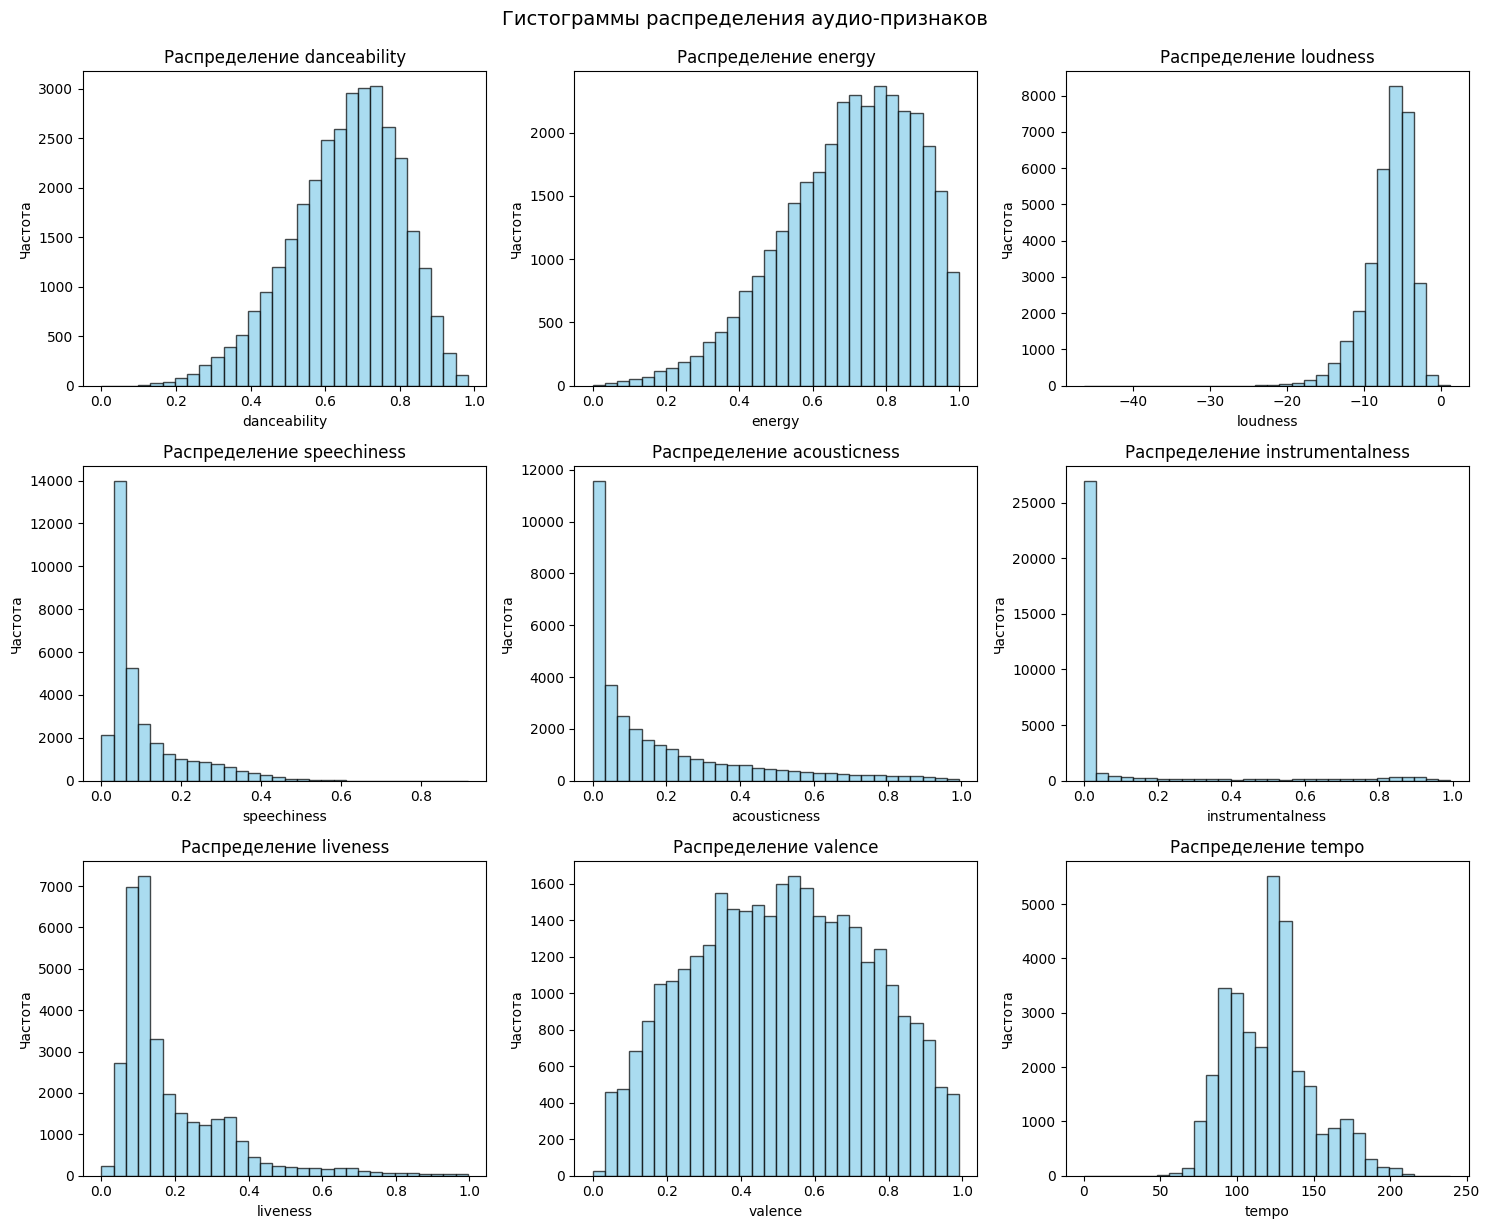

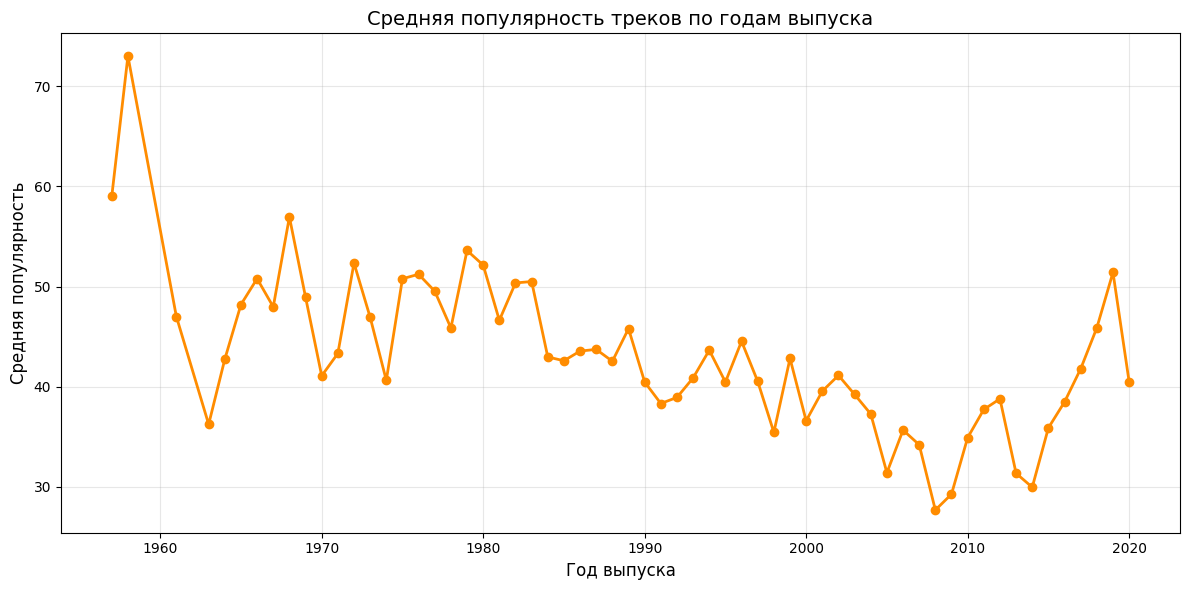

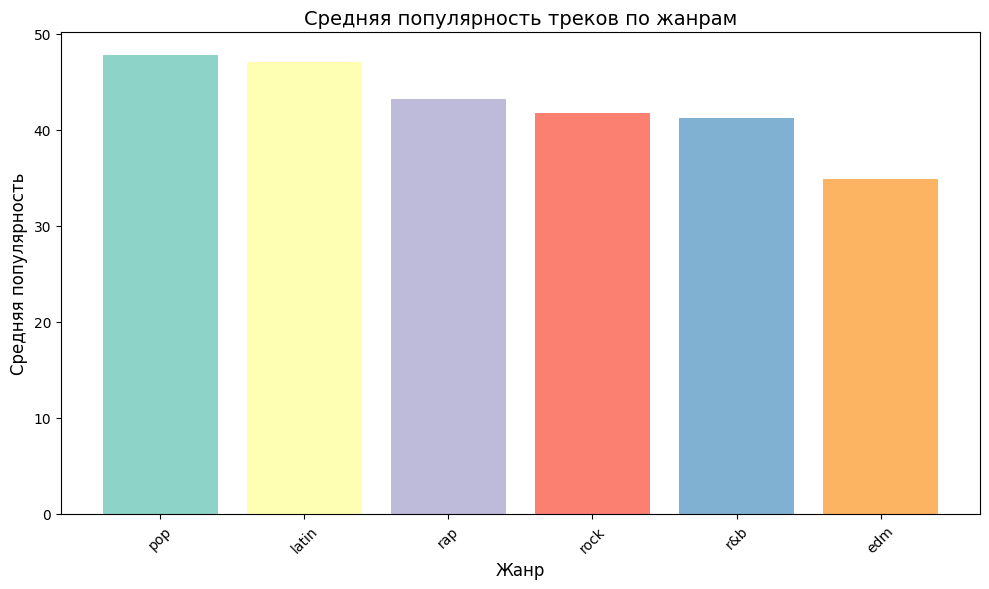

<Figure size 1200x600 with 0 Axes>

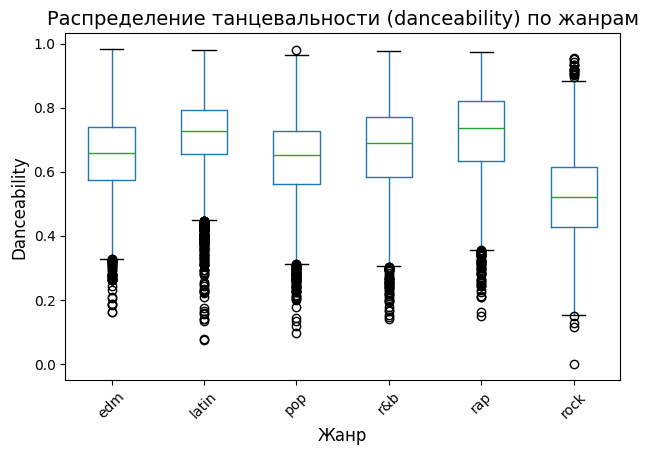

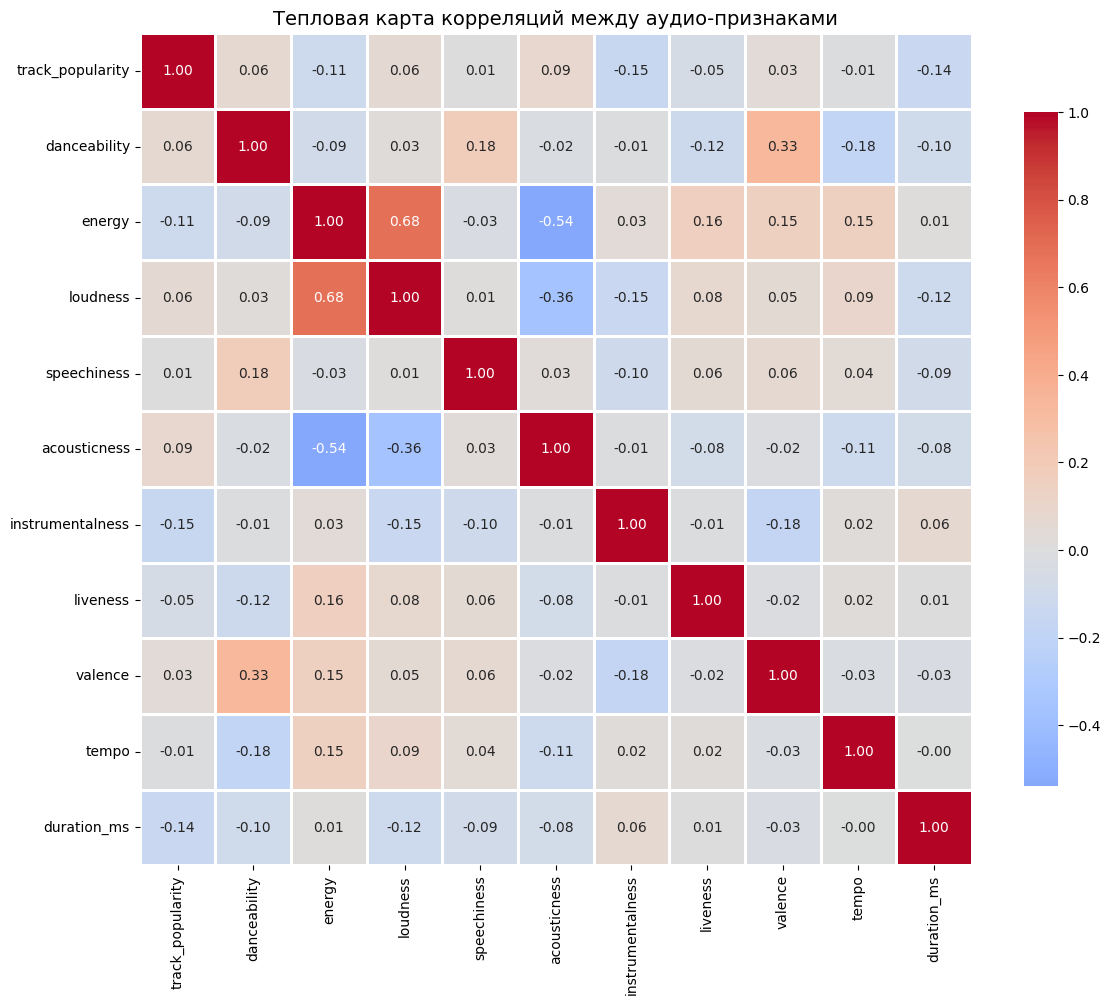

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
key_features = ['danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for i, feature in enumerate(key_features):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    ax.hist(df_cleaned[feature].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Распределение {feature}', fontsize=12)
    ax.set_xlabel(feature)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.suptitle('Гистограммы распределения аудио-признаков', y=1.02, fontsize=14)
plt.show()


df_cleaned['release_year'] = df_cleaned['track_album_release_date'].dt.year

# Группировка по году и вычисление средней популярности
yearly_popularity = df_cleaned.groupby('release_year')['track_popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_popularity['release_year'], yearly_popularity['track_popularity'],
         marker='o', linewidth=2, markersize=6, color='darkorange')

plt.title('Средняя популярность треков по годам выпуска', fontsize=14)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


genre_popularity = df_cleaned.groupby('playlist_genre')['track_popularity'] \
    .agg(['mean', 'count']).reset_index()
genre_popularity = genre_popularity.sort_values('mean', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(genre_popularity['playlist_genre'], genre_popularity['mean'],
               color=plt.cm.Set3(np.arange(len(genre_popularity))))

plt.title('Средняя популярность треков по жанрам', fontsize=14)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
df_cleaned.boxplot(column='danceability', by='playlist_genre', grid=False)
plt.title('Распределение танцевальности (danceability) по жанрам', fontsize=14)
plt.suptitle('')  # Убираем автоматический заголовок
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Danceability', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


"Heatmap корреляционной матрицы"
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8})

plt.title('Тепловая карта корреляций между аудио-признаками', fontsize=14)


plt.tight_layout()
plt.show()

In [ ]:
# Группировка по жанру и вычисление средних значений
genre_audio_stats = df_cleaned.groupby('playlist_genre')[key_features].mean()

print("Средние значения аудио-признаков по жанрам:")
print(genre_audio_stats.round(3))


pivot_year_genre = pd.pivot_table(
    df_cleaned,
    values='track_id',
    index='release_year',
    columns='playlist_genre',
    aggfunc='count',
    fill_value=0
)

print("Количество треков по годам и жанрам (первые 5 лет):")
print(pivot_year_genre.head())

artist_stats = df_cleaned.groupby('track_artist').agg(
    avg_popularity=('track_popularity', 'mean'),
    track_count=('track_id', 'count'),
    avg_duration=('duration_ms', 'mean')
).reset_index()

top_artists = artist_stats[artist_stats['track_count'] >= 5] \
    .sort_values('avg_popularity', ascending=False) \
    .head(10)

print("Топ-10 артистов по средней популярности (минимум 5 треков):")
print(top_artists[['track_artist', 'avg_popularity', 'track_count', 'avg_duration']].round(2))


Средние значения аудио-признаков по жанрам:
                danceability  energy  loudness  speechiness  acousticness  \
playlist_genre                                                              
edm                    0.655   0.802    -5.427        0.087         0.082   
latin                  0.713   0.708    -6.264        0.103         0.211   
pop                    0.639   0.701    -6.315        0.074         0.171   
r&b                    0.670   0.591    -7.865        0.117         0.260   
rap                    0.718   0.651    -7.042        0.198         0.192   
rock                   0.521   0.733    -7.589        0.058         0.145   

                instrumentalness  liveness  valence    tempo  
playlist_genre                                                
edm                        0.219     0.212    0.401  125.768  
latin                      0.044     0.181    0.606  118.622  
pop                        0.060     0.177    0.504  120.743  
r&b                     